## Assignment 6: K Means Clustering

#### Name: Jahnavi Murali
#### Register No.: 3122215001038 

### Load Dataset

In [82]:
import pandas as pd
df = pd.read_csv('archive/train.csv')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (7352, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Data Preprocessing

Checking for null values

In [83]:
print('Null values:',df.isnull().values.sum())
print('Feature data types: ')
df.dtypes

# No null values

Null values: 0
Feature data types: 


tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

There are no null/missing values in this dataset

Checking for duplicate data

In [84]:
print('Number of duplicates in dataset:{}'.format(sum(df.duplicated())))
# no duplicates

Number of duplicates in dataset:0


There is no duplicated data

Features and Labels

In [93]:
import numpy as np
Labels = df['Activity']
X = df.drop(['subject', 'Activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


Normalize the feature space

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
_X_ = scaler.fit_transform(X)

### Exploratory Data Analysis

In [10]:
# Number of recordings per subject (identified by id)
df['subject'].groupby(df['subject']).count()

subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64

In [87]:
# Number of recordings per activity
activity_counts=df['Activity'].groupby(df['Activity']).size()
activity_counts

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

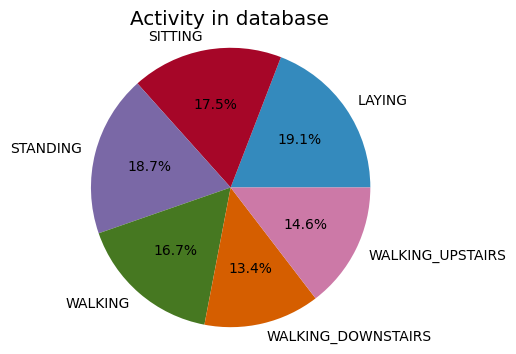

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%')
plt.title('Activity in database')
plt.axis('equal')
plt.show()

Therefore, we see that the dataset is balanced.

In [89]:
# Number of activities recorded by each subject
activity_per_subject_count = df['subject'].groupby(df['Activity']).value_counts()
activity_per_subject_count

Activity          subject
LAYING            21         90
                  19         83
                  28         80
                  26         76
                  27         74
                             ..
WALKING_UPSTAIRS  5          47
                  21         47
                  22         42
                  8          41
                  19         40
Name: subject, Length: 126, dtype: int64

In [91]:
import plotly.express as px
px.histogram(data_frame=df,x='subject',color='Activity',barmode='group',title='Activity Per Subject')

A relatively uniform distribution of activities over subjects is observed, that is, each subject has made more or less the same number of recordings, with respect to each label

Correlation among various features

<AxesSubplot:>

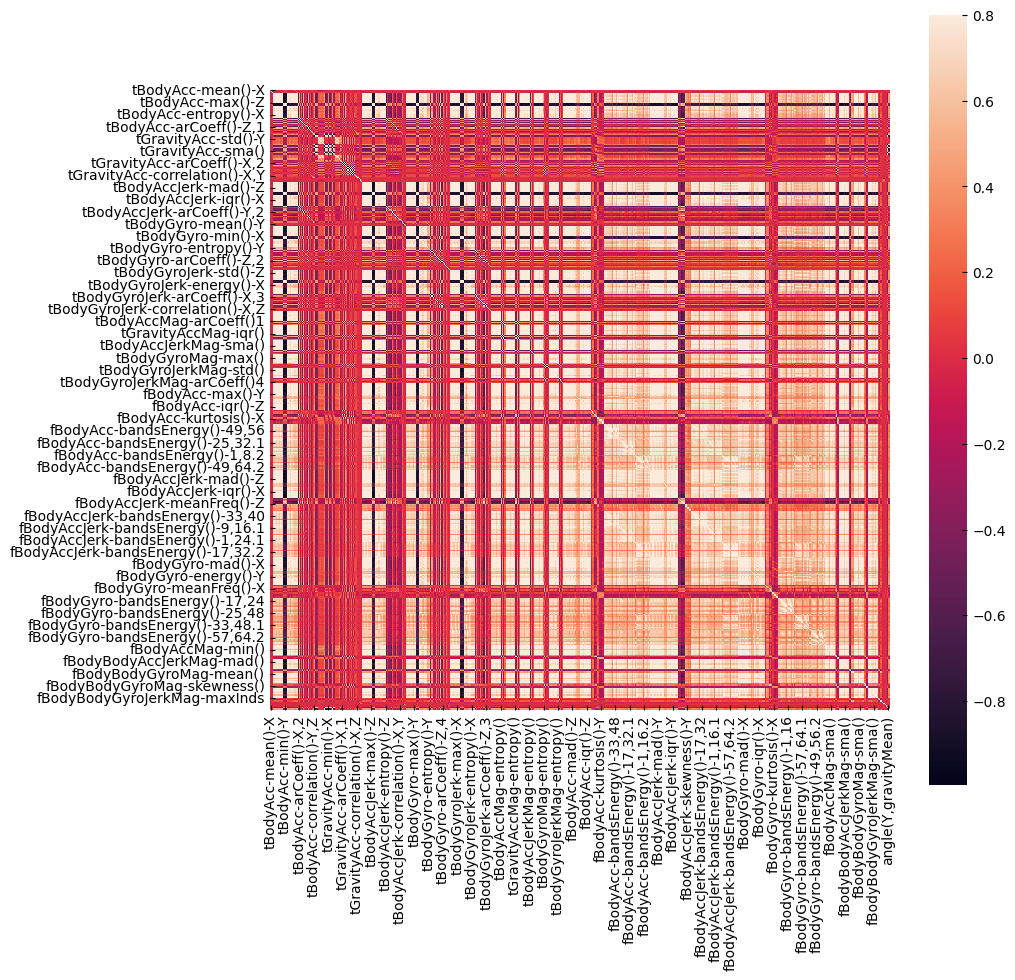

In [94]:
import seaborn as sns
corrmat=pd.DataFrame(X).corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True)

As seen from the plots given below, tBodyAccMag-mean() attribute differs signicantly with respect to dynamic and static activities

In [24]:
px.histogram(df,x='tBodyAccMag-mean()',color='Activity')

In [25]:
px.box(df, x='Activity',y='tBodyAccMag-mean()')

### Dimensionality Reduction to 2 principal components using PCA

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(_X_)
X_pca

array([[-16.13854371,   2.15202486],
       [-15.2961943 ,   1.38714363],
       [-15.13701861,   2.47335116],
       ...,
       [ 14.33343587, -12.26071265],
       [ 12.87601895, -14.07125711],
       [ 13.01610365, -12.24426126]])

In [100]:
feature_names = X.columns
components_df = pd.DataFrame(pca.components_, columns=feature_names)
print("Principal Component Analysis Components:")
print(components_df)

Principal Component Analysis Components:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.000028          -0.002473          -0.001527          0.056213   
1           0.015638          -0.000080          -0.004052         -0.011165   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0          0.056788          0.054363          0.055969          0.056264   
1         -0.025959         -0.031240         -0.009835         -0.028635   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0          0.053886          0.055892  ...                        -0.005451   
1         -0.035351         -0.010926  ...                         0.068717   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                         0.012324                         0.010199   
1                        -0.016957                        -0.012832   

   angle(tBodyAccMean,gravity)  an

In PCA, the original features are transformed into a new set of orthogonal variables called principal components (PCs). Each principal component is a linear combination of the original features.

Here, in the Components df:
- Each row corresponds to a principal component.
- Each column corresponds to an original feature in your dataset.
- The values within each cell represent the weight or contribution of the corresponding original feature to the respective principal component.

### Train,Test & Validation Split

In [102]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X_pca, Labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 5881
Validation set size: 735
Testing set size: 736


### K-Means Clustering: Sci-kit Learn

In [109]:
from sklearn.cluster import KMeans

# for k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

train_cluster_labels = kmeans.labels_

# Cluster labels for the validation set
val_cluster_labels = kmeans.predict(X_val)

# Cluster labels for the testing set
test_cluster_labels = kmeans.predict(X_test)


In [104]:
from sklearn.metrics import silhouette_score

# Measure inertia (sum of squared distances to nearest cluster center)
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Measure silhouette score
silhouette = silhouette_score(X_train, train_cluster_labels)
print("Silhouette Score:", silhouette)


Inertia: 203276.1773255688
Silhouette Score: 0.6067889836346019


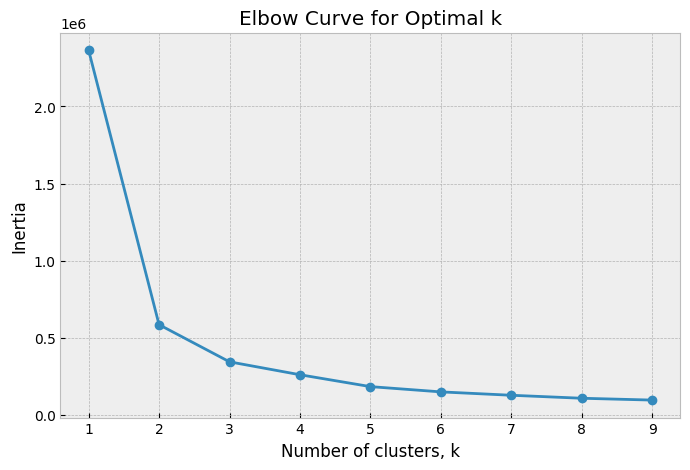

In [105]:
# Calculate inertia for different values of k
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_pca)
    inertias.append(model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.xticks(ks)
plt.show()

The optimal k value is typically where the inertia starts to decrease at a slower rate, resembling an "elbow" in the plot.
Therefore, k = 4, 5 or 6, maybe an optimal value for k.

In [108]:
# k = 4
kmeans_ = KMeans(n_clusters=4, random_state=42)
kmeans_.fit(X_train)
print("Silhouette Score for k=4:", silhouette_score(X_train, kmeans_.labels_))


# k = 5
kmeans_ = KMeans(n_clusters=5, random_state=42)
kmeans_.fit(X_train)
print("Silhouette Score for k=5:", silhouette_score(X_train, kmeans_.labels_))

# k = 6
kmeans_ = KMeans(n_clusters=6, random_state=42)
kmeans_.fit(X_train)
print("Silhouette Score for k=6:", silhouette_score(X_train, kmeans_.labels_))

Silhouette Score for k=4: 0.6067889836346019
Silhouette Score for k=5: 0.49684676485424206
Silhouette Score for k=6: 0.473849835748193


Therefore, k=4 is optimal

C:\Users\JAHNAVI\AppData\Local\Temp\ipykernel_17448\4059906568.py:15: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



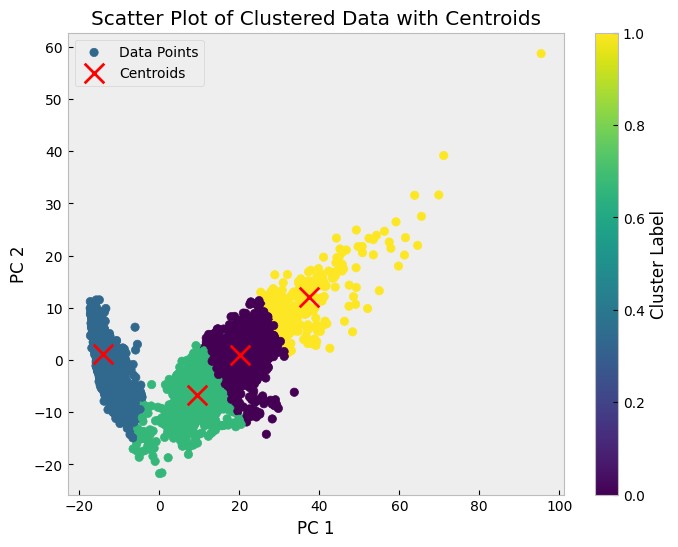

In [112]:
import matplotlib.pyplot as plt

# Scatter plot of clustered train data with centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_cluster_labels, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')

plt.title('Scatter Plot of Clustered Data with Centroids')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(False)
plt.show()


C:\Users\JAHNAVI\AppData\Local\Temp\ipykernel_17448\1506265182.py:11: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



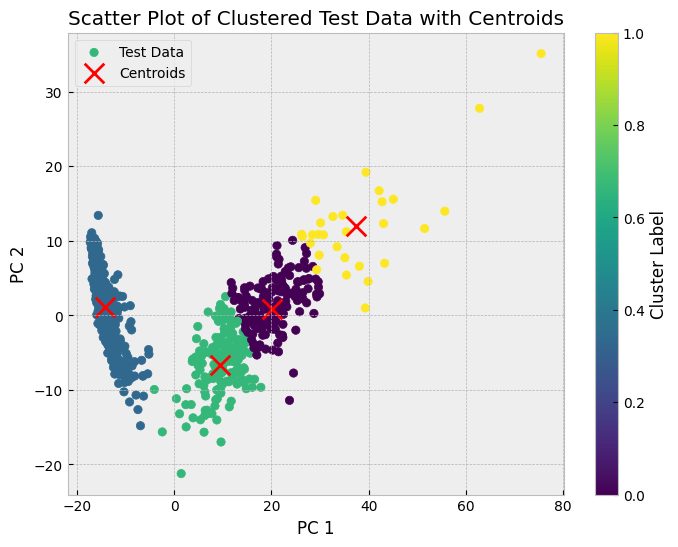

In [113]:
# Predict cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test)

# Scatter plot of test data with centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_cluster_labels, cmap='viridis', label='Test Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Clustered Test Data with Centroids')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


C:\Users\JAHNAVI\AppData\Local\Temp\ipykernel_17448\3049561584.py:11: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



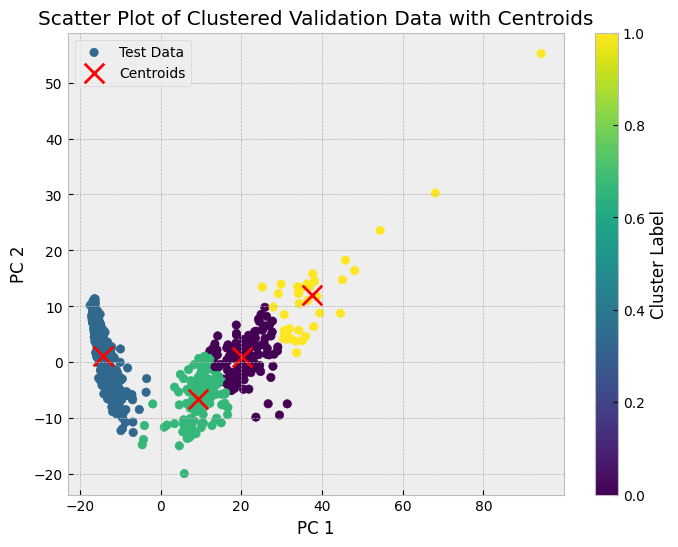

In [114]:
# Predict cluster labels for the test data
val_cluster_labels = kmeans.predict(X_val)

# Scatter plot of test data with centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=val_cluster_labels, cmap='viridis', label='Test Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('Scatter Plot of Clustered Validation Data with Centroids')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


### K-Means Clustering Algorithm: User-defined

In [116]:
import numpy as np

def initialize_centroids(X, k):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]
    return centroids

def assign_clusters(X, centroids):
    # Euclidean distance
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_labels = np.argmin(distances, axis=0)
    return cluster_labels

def update_centroids(X, cluster_labels, k):
    new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        cluster_labels = assign_clusters(X, centroids)
        
        new_centroids = update_centroids(X, cluster_labels, k)
        
        if np.allclose(new_centroids, centroids):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_labels


X = X_train
k = 4
centroids, cluster_labels = kmeans(X_train, k)

# Print centroids and cluster labels
print("Centroids:")
print(centroids)
print("\nCluster Labels:")
print(cluster_labels)

print("\n\nSilhouette Score for k=4:", silhouette_score(X_train, cluster_labels))


Centroids:
[[ 27.41570658   5.28106894]
 [ 12.26102255  -4.44939277]
 [-15.26181552   4.00109699]
 [-11.60475841  -4.71400514]]

Cluster Labels:
[2 1 1 ... 1 2 1]


Silhouette Score for k=4: 0.5115860981414388


### Learning Outcomes

- Normalizaing data features for favourable results.
- Different visualizations to understand the dataset and its trends.
- Dimensionality Reduction technique PCA (Principle Component Analysis) to simplify the large data set into a smaller set while still maintaining significant patterns and trends.
- Using scikit-learn's KMeans Algorithm, and comparing models with different values of k, using Silhouette Score. 
- Using the elbow-curve method, to find an optimal value of k.
- Writing a simple user-defined K-means algorithm (using euclidean distance metric) without much of the optimizations offered by scikit-learn.

### GitHub Link

https://github.com/jahnavimurali/ML-Assignments